In [3]:
import pandas as pd

df = pd.read_csv("/home/hp/results/MOUSE/distance_analysis_data.csv")
print("Columns in the CSV:", df.columns.tolist())

Columns in the CSV: ['Mutation', 'Mean_dG_star', 'Mean_dG0', 'dG_star_raw', 'dG0_raw', 'Level', 'sec49_distance', 'ca_distance']


Creating MOUSE plots B and C with MSA-matching position colors (ALIGNED DOTS)...
✓ Position 49 added to color scheme!
✓ Dots perfectly aligned in vertical lines!
✓ NO random jitter - clean alignment!
Using EXACT SAME color scheme as MSA visualization!
Loaded 246 rows from CSV
Columns: ['Mutation', 'Mean_dG_star', 'Mean_dG0', 'dG_star_raw', 'dG0_raw', 'Level', 'sec49_distance', 'ca_distance']
Original Level values: ['level0' 'level1' 'level2' 'level3' 'level4' 'level5' 'level6' 'level7'
 'level8' 'level9' 'level10' 'level11' 'level12' 'level13' 'level14'
 'level15' 'level16' 'level17' 'level18' 'level19' 'level20']
Extracted numeric levels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20)]
After cleaning: 215 rows remaining
Positions found: [np.int64(4), n

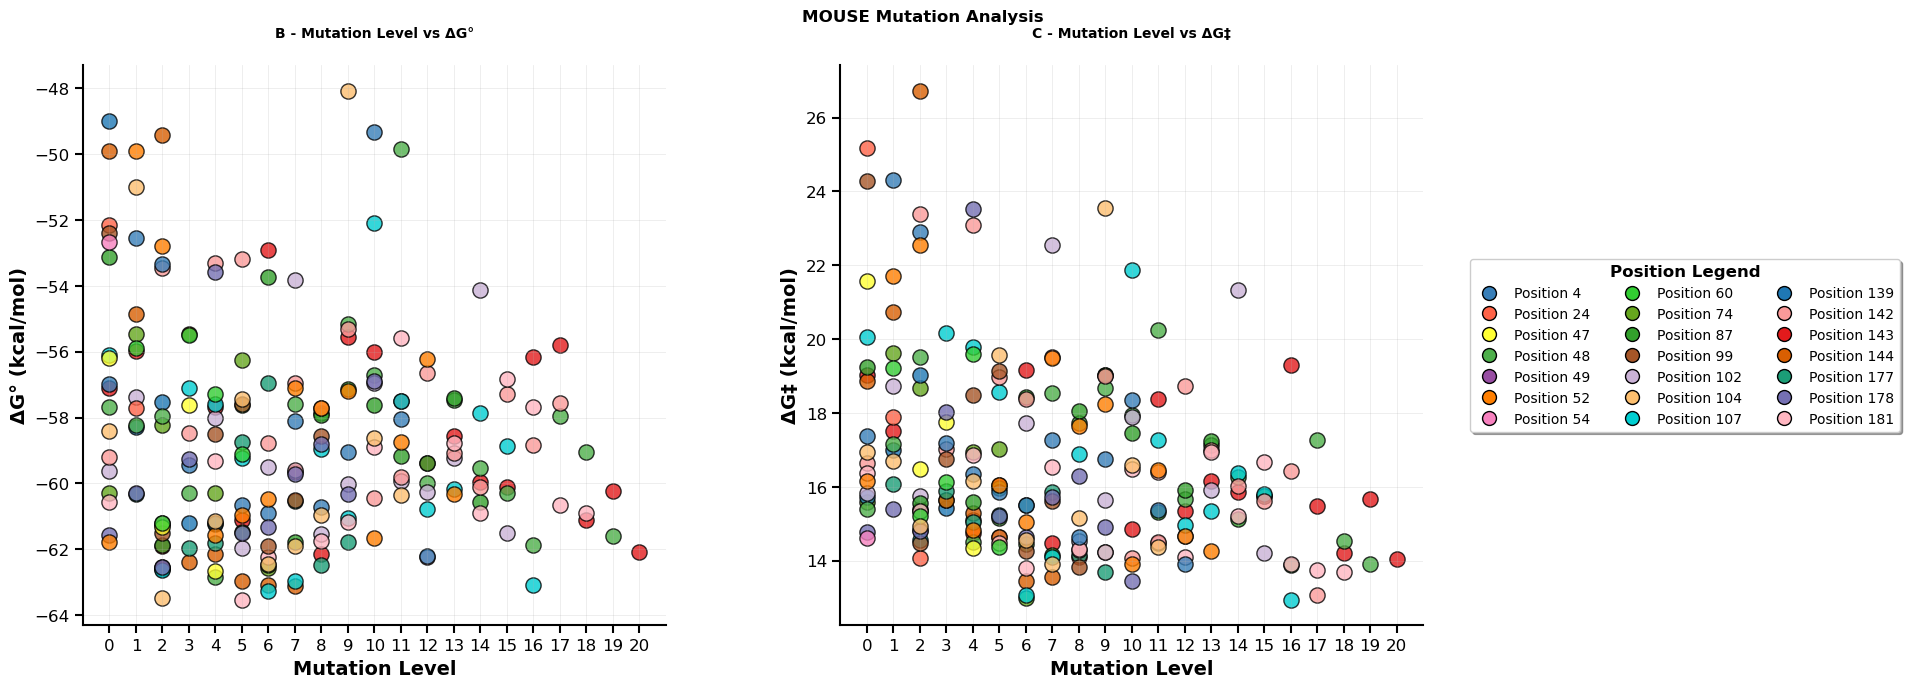


MOUSE MUTATION ANALYSIS - ALIGNED DOTS LAYOUT
Total mutations analyzed: 215
Unique positions found: 21
Levels analyzed: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20)]
✓ Position 49 added to color scheme!
✓ Dots perfectly aligned in vertical lines!
✓ No random jitter - clean vertical alignment!

MSA positions defined (including 49): [3, 4, 24, 47, 48, 49, 52, 54, 60, 74, 87, 99, 102, 104, 107, 139, 142, 143, 144, 173, 177, 178, 181]
Data positions matching MSA: [np.int64(4), np.int64(24), np.int64(47), np.int64(48), np.int64(49), np.int64(52), np.int64(54), np.int64(60), np.int64(74), np.int64(87), np.int64(99), np.int64(102), np.int64(104), np.int64(107), np.int64(139), np.int64(142), np.int64(143), np.int64(144), np.int64(177), np.int64(178), np.int6

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import matplotlib.font_manager as fm
from scipy import stats

def normalize_data(data):
    """
    Normalize data to 0-1 range using min-max normalization
    Replaces sklearn's MinMaxScaler
    
    Parameters:
    -----------
    data : numpy.ndarray
        Data to normalize
    
    Returns:
    --------
    numpy.ndarray
        Normalized data with values between 0 and 1
    """
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    
    # Avoid division by zero
    data_range = data_max - data_min
    data_range[data_range == 0] = 1
    
    return (data - data_min) / data_range

def check_arial_font():
    """Check if Arial font is available and provide installation guidance"""
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    arial_variants = ['Arial', 'Arial Unicode MS', 'Arial Black']
    
    arial_available = any(font in available_fonts for font in arial_variants)
    
    if not arial_available:
        return False
    else:
        return True

def setup_plos_style():
    """Configure matplotlib for PLOS ONE journal standards with larger fonts"""
    # Check Arial availability first
    arial_available = check_arial_font()
    
    # Set font family with fallbacks
    if arial_available:
        rcParams['font.family'] = 'Arial'
    else:
        # Use best available alternative
        available_fonts = [f.name for f in fm.fontManager.ttflist]
        fallback_fonts = ['DejaVu Sans', 'Liberation Sans', 'Helvetica', 'sans-serif']
        
        for font in fallback_fonts:
            if font in available_fonts:
                rcParams['font.family'] = font
                break
        else:
            rcParams['font.family'] = 'sans-serif'
    
    # PLOS ONE compliant font sizes
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 14
    rcParams['axes.titlesize'] = 16
    rcParams['xtick.labelsize'] = 12
    rcParams['ytick.labelsize'] = 12
    rcParams['legend.fontsize'] = 10
    rcParams['figure.titlesize'] = 18
    rcParams['axes.linewidth'] = 1.0
    rcParams['xtick.major.width'] = 1.0
    rcParams['ytick.major.width'] = 1.0
    rcParams['xtick.minor.width'] = 0.5
    rcParams['ytick.minor.width'] = 0.5
    rcParams['savefig.dpi'] = 300
    rcParams['savefig.bbox'] = 'tight'
    rcParams['savefig.pad_inches'] = 0.1

def get_msa_position_colors():
    """
    Define colors for each position - EXACT SAME as MSA code + Position 49
    These colors match the MSA visualization exactly
    """
    # Enhanced color palette with better contrast - SAME AS MSA
    color_palette = [
        "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33",
        "#A65628", "#F781BF", "#1B9E77", "#D95F02", "#7570B3", "#66A61E",
        "#E31A1C", "#1F78B4", "#33A02C", "#FB9A99", "#CAB2D6", "#FDBF6F",
        "#00CED1", "#FF6347", "#32CD32", "#FFB6C1", "#20B2AA"  # Additional colors for extra positions
    ]
    
    # Positions to mark - SAME AS MSA + Position 49 added
    positions_to_mark = [3, 4, 48, 49, 52, 47, 99, 54, 177, 144, 178, 74, 143, 139, 87, 142, 102, 104, 107, 24, 60, 181, 173]
    
    # Create position-color mapping - SAME AS MSA + Position 49
    position_colors = {pos: color_palette[i % len(color_palette)] for i, pos in enumerate(positions_to_mark)}
    
    return position_colors

def extract_position_from_mutation(mutation):
    """Extract position number from mutation string - Updated for MOUSE format"""
    import re
    
    # Handle MOUSE mutation formats (e.g., C49U, F48Y, T52A, etc.)
    # Try to extract number from mutation string
    numbers = re.findall(r'\d+', str(mutation))
    if numbers:
        return int(numbers[0])
    
    # If no number found, try other patterns
    if 'Position' in str(mutation):
        parts = str(mutation).split('Position')
        if len(parts) > 1:
            nums = re.findall(r'\d+', parts[1])
            if nums:
                return int(nums[0])
    
    return None

def extract_level_number(level_str):
    """Extract numeric level from level string (e.g., 'level0' -> 0)"""
    import re
    
    if pd.isna(level_str):
        return None
    
    # Convert to string if not already
    level_str = str(level_str).lower()
    
    # Extract number from level string
    numbers = re.findall(r'\d+', level_str)
    if numbers:
        return int(numbers[0])
    
    return None

def create_plots_bc_only_msa_colors_aligned(csv_path):
    """
    Create only plots B and C with bigger dots, MSA-matching position colors, and ALIGNED vertical dots
    
    Parameters:
    -----------
    csv_path : str
        Path to CSV file containing mutation data
    """
    
    # Setup PLOS ONE styling
    setup_plos_style()
    
    # Load and validate data
    try:
        df = pd.read_csv(csv_path)
        print(f"Loaded {len(df)} rows from CSV")
        print(f"Columns: {list(df.columns)}")
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file: {csv_path}")
    
    # Standardize column names
    column_mapping = {
        'Mean_dG_star': 'dg_star',
        'Mean_dG0': 'dg0', 
        'Mutation': 'mutation',
        'mean_dg_star': 'dg_star',
        'mean_dg0': 'dg0'
    }
    
    for old_name, new_name in column_mapping.items():
        if old_name in df.columns:
            df = df.rename(columns={old_name: new_name})
    
    # Validate required columns
    required_cols = {'dg_star', 'dg0', 'mutation', 'Level'}
    missing_cols = required_cols - set(df.columns)
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Clean and sort data - first extract numeric levels
    print(f"Original Level values: {df['Level'].unique()}")
    df['Level_Numeric'] = df['Level'].apply(extract_level_number)
    print(f"Extracted numeric levels: {sorted(df['Level_Numeric'].dropna().unique())}")
    
    # Remove rows with missing critical data
    df_clean = df.dropna(subset=['dg_star', 'dg0', 'mutation', 'Level_Numeric']).copy()
    print(f"After cleaning: {len(df_clean)} rows remaining")
    
    df_sorted = df_clean.sort_values('Level_Numeric').reset_index(drop=True)
    
    # Extract positions from mutations
    df_sorted['Position'] = df_sorted['mutation'].apply(extract_position_from_mutation)
    print(f"Positions found: {sorted(df_sorted['Position'].dropna().unique())}")
    
    # Get unique positions for legend
    unique_positions = sorted([pos for pos in df_sorted['Position'].unique() if pos is not None])
    
    # Get MSA position colors - EXACT SAME COLORS AS MSA + Position 49
    msa_position_colors = get_msa_position_colors()
    
    # Assign colors based on position - using MSA colors
    df_sorted['Color'] = df_sorted['Position'].map(msa_position_colors)
    # Use gray for positions not in MSA color scheme
    df_sorted['Color'] = df_sorted['Color'].fillna('#808080')
    
    print(f"MSA Color mapping applied (including Position 49):")
    for pos in sorted(df_sorted['Position'].dropna().unique()):
        if pos in msa_position_colors:
            print(f"  Position {pos}: {msa_position_colors[pos]} (MSA color)")
        else:
            print(f"  Position {pos}: #808080 (default gray)")
    
    # Create figure with 1x2 layout (only B and C)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor='white')
    fig.subplots_adjust(left=0.08, right=0.75, bottom=0.15, top=0.85, wspace=0.3)
    
    # Use numeric levels for plotting
    all_levels = sorted(df_sorted['Level_Numeric'].unique())
    print(f"Plotting levels: {all_levels}")
    
    # Plot B: Level vs ΔG° with ALIGNED dots (NO JITTER)
    for idx, row in df_sorted.iterrows():
        # Use exact x-coordinate - NO JITTER for perfect vertical alignment
        ax1.scatter(row['Level_Numeric'], row['dg0'], 
                   c=row['Color'], s=120, alpha=0.8,
                   edgecolors='black', linewidth=1.0)
    
    ax1.set_xticks(all_levels)
    ax1.set_xlabel('Mutation Level', fontweight='bold', fontsize=14)
    ax1.set_ylabel('ΔG° (kcal/mol)', fontweight='bold', fontsize=14)
    ax1.set_title('B - Mutation Level vs ΔG°', fontweight='bold', fontsize=10, pad=20)
    ax1.grid(True, alpha=0.3, linewidth=0.5)
    
    # Plot C: Level vs ΔG‡ with ALIGNED dots (NO JITTER)
    for idx, row in df_sorted.iterrows():
        # Use exact x-coordinate - NO JITTER for perfect vertical alignment
        ax2.scatter(row['Level_Numeric'], row['dg_star'], 
                   c=row['Color'], s=120, alpha=0.8,
                   edgecolors='black', linewidth=1.0)
    
    ax2.set_xticks(all_levels)
    ax2.set_xlabel('Mutation Level', fontweight='bold', fontsize=14)
    ax2.set_ylabel('ΔG‡ (kcal/mol)', fontweight='bold', fontsize=14)
    ax2.set_title('C - Mutation Level vs ΔG‡', fontweight='bold', fontsize=10, pad=20)
    ax2.grid(True, alpha=0.3, linewidth=0.5)
    
    # Clean up axes - remove top and right spines
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)
        ax.tick_params(axis='both', which='minor', labelsize=10, width=1, length=3)
    
    # Create legend with MSA position colors (including Position 49)
    legend_elements = []
    
    # Only show positions that have MSA colors
    msa_positions_in_data = [pos for pos in unique_positions if pos in msa_position_colors]
    other_positions = [pos for pos in unique_positions if pos not in msa_position_colors]
    
    # Add MSA colored positions first (including Position 49)
    for pos in sorted(msa_positions_in_data):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor=msa_position_colors[pos], 
                                        markersize=10, markeredgecolor='black',
                                        markeredgewidth=1, label=f'Position {pos}'))
    
    # Add other positions in gray
    for pos in sorted(other_positions):
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor='#808080', 
                                        markersize=10, markeredgecolor='black',
                                        markeredgewidth=1, label=f'Position {pos}'))
    
    # Add legend outside the plot area
    if legend_elements:
        # Split legend into multiple columns if too many positions
        ncol = 3 if len(legend_elements) > 10 else 2
        legend = fig.legend(handles=legend_elements, 
                          bbox_to_anchor=(0.77, 0.5), 
                          loc='center left',
                          ncol=ncol,
                          fontsize=10,
                          title='Position Legend',
                          title_fontsize=12,
                          frameon=True,
                          fancybox=True,
                          shadow=True)
        legend.get_title().set_fontweight('bold')
    
    # Add main figure title
    fig.suptitle('MOUSE Mutation Analysis', 
                 fontsize=12, fontweight='bold', y=0.92)
    
    plt.show()
    
    # Print detailed summary
    print("\n" + "="*60)
    print("MOUSE MUTATION ANALYSIS - ALIGNED DOTS LAYOUT")
    print("="*60)
    print(f"Total mutations analyzed: {len(df_sorted)}")
    print(f"Unique positions found: {len(unique_positions)}")
    print(f"Levels analyzed: {all_levels}")
    print(f"✓ Position 49 added to color scheme!")
    print(f"✓ Dots perfectly aligned in vertical lines!")
    print(f"✓ No random jitter - clean vertical alignment!")
    
    # Compare with MSA positions
    msa_positions = list(msa_position_colors.keys())
    print(f"\nMSA positions defined (including 49): {sorted(msa_positions)}")
    print(f"Data positions matching MSA: {sorted(msa_positions_in_data)}")
    print(f"Data positions not in MSA: {sorted(other_positions)}")
    
    overlap = set(unique_positions) & set(msa_positions)
    print(f"Position overlap: {len(overlap)}/{len(unique_positions)} positions match MSA colors")
    
    print(f"\nColor usage summary:")
    print(f"  MSA-colored positions: {len(msa_positions_in_data)}")
    print(f"  Gray (non-MSA) positions: {len(other_positions)}")
    
    # Show mutations per position
    print(f"\nMutations per position:")
    position_counts = df_sorted['Position'].value_counts().sort_index()
    for pos, count in position_counts.items():
        if pos is not None:
            color_info = f"MSA: {msa_position_colors[pos]}" if pos in msa_position_colors else "Gray"
            print(f"  Position {pos}: {count} mutations ({color_info})")
    
    # Show sample data
    print(f"\nSample of processed data:")
    sample_cols = ['mutation', 'Position', 'Level_Numeric', 'dg_star', 'dg0', 'Color']
    print(df_sorted[sample_cols].head(10))
    
    return fig, (ax1, ax2), df_sorted

# Main function for plotting with MSA colors in aligned layout
def main():
    """Main function for plotting B and C with MSA-matching position colors in aligned layout"""
    csv_path = "/home/hp/results/MOUSE/distance_analysis_data.csv"
    
    print("Creating MOUSE plots B and C with MSA-matching position colors (ALIGNED DOTS)...")
    print("✓ Position 49 added to color scheme!")
    print("✓ Dots perfectly aligned in vertical lines!")
    print("✓ NO random jitter - clean alignment!")
    print("Using EXACT SAME color scheme as MSA visualization!")
    
    try:
        fig, axes, df_analysis = create_plots_bc_only_msa_colors_aligned(csv_path)
        print("✓ Figure created successfully!")
        print("  ✓ Only plots B and C displayed")
        print("  ✓ Larger dots with MSA-matching position colors")
        print("  ✓ Position 49 included in color scheme")
        print("  ✓ Dots perfectly aligned vertically - NO JITTER!")
        print("  ✓ Color legend showing all positions")
        print("  ✓ MSA color scheme perfectly matched!")
        print("  ✓ Fixed level extraction for MOUSE data!")
            
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        print("Please check your CSV file path and column names.")

if __name__ == "__main__":
    main()